In [1]:
### Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2

### About the dataset
This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.The data is divided in multiple datasets for better understanding and organization.The below image is taken from the kaggle dataset that gives an idea about the dataset schema and its foreign keys through which each dataset is connected.

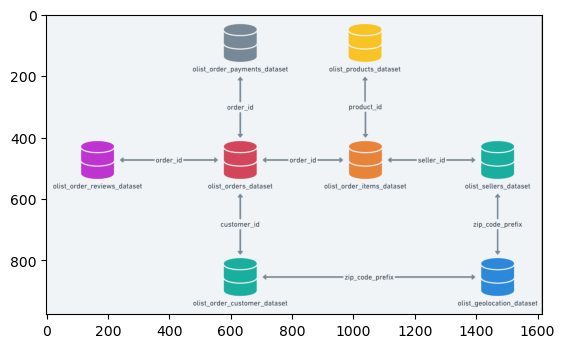

In [2]:
## Reads the image
img = mpimg.imread("ecommerce schema.png")
 
# Output Images
plt.imshow(img)

### Part1 - Merging and cleaning the dataset

We have cleaned the data by replacing the null values wherever required. Dropping some of the features that were irrelevant.
Also we have tried to change the data types for the date variables. Tried to remove some insights like year,month,days from the timestamp variable which further helped in analysizng the dataset.

In [3]:
## Reading the datasets
customers=pd.read_csv("olist_customers_dataset.csv")
orders=pd.read_csv("olist_orders_dataset.csv")
order_items=pd.read_csv("olist_order_items_dataset.csv")
order_payments=pd.read_csv("olist_order_payments_dataset.csv")
order_reviews=pd.read_csv("olist_order_reviews_dataset.csv")
products=pd.read_csv("olist_products_dataset.csv")
sellers=pd.read_csv("olist_sellers_dataset.csv")
geolocation=pd.read_csv("olist_geolocation_dataset.csv")
product_category_name=pd.read_csv("product_category_name_translation.csv")

In [4]:
# Customers Dataset
customers.head()
customers.duplicated().sum()
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [5]:
## Orders Dataset
orders.head()
orders.duplicated().sum()
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [6]:
## Changing the datatype of all time columns to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_status'] = orders['order_status'].astype('category')
orders['date'] = orders['order_purchase_timestamp'].dt.date

In [7]:
## Dropping the not applicable rows 
orders.dropna(inplace=True)

In [8]:
## Order Items dataset
order_items.isnull().sum()
orders.duplicated().sum()

0

In [9]:
## Order Payments dataset
order_payments.head()
order_payments.isnull().sum()
order_payments.duplicated().sum()

0

In [10]:
## Order Reviews dataset
order_reviews.head()
order_reviews.duplicated().sum()
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [11]:
order_reviews.drop(columns=['review_comment_title','review_comment_message'],axis=1,inplace=True)

In [12]:
order_reviews.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [13]:
## Products dataset
products.head()
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [14]:
## As the product_category_name feature has many null values ,and as its a categorical varibale we will replace the null values
## with the mode of it

products['product_category_name'].fillna(products['product_category_name'].mode()[0],inplace=True)

<Axes: >

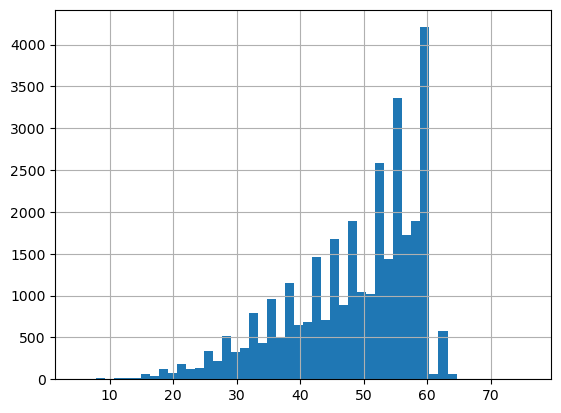

In [15]:
## By plotting a histogram. As we can see aproximately value 58 is moslty repeated hence we will fill the null values with the mode.

products['product_name_lenght'].hist(bins=50)

In [16]:
## Similarly product_name_lenght and product_description_lenght feature has many null values, and as they are numeric values
## we can replace the null values with their median.

products['product_name_lenght'].fillna(products['product_name_lenght'].median(),inplace=True)
products['product_description_lenght'].fillna(products['product_description_lenght'].median(),inplace=True)

<Axes: >

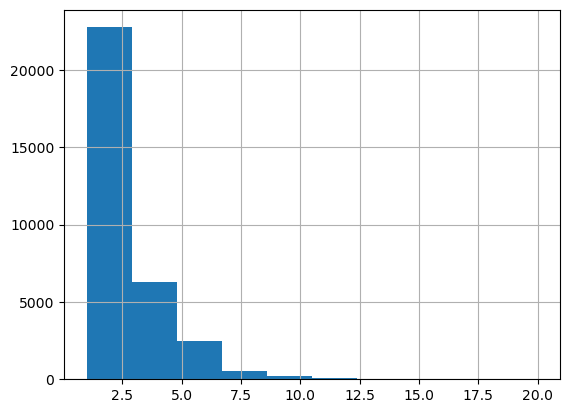

In [17]:
## We can plot a bar graph to get an idea about the distribution of value for product_photos_qty feature. 
## Their are approximately 1 to 3 photos per product.
products['product_photos_qty'].hist()

In [18]:
## We will replace the same null values with its median
products['product_photos_qty'].fillna(products['product_photos_qty'].median(),inplace=True)

In [19]:
products['product_weight_g'].fillna(products['product_weight_g'].median(),inplace=True)
products['product_length_cm'].fillna(products['product_length_cm'].median(),inplace=True)
products['product_height_cm'].fillna(products['product_height_cm'].median(),inplace=True)
products['product_width_cm'].fillna(products['product_width_cm'].median(),inplace=True)

In [20]:
products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [21]:
## Sellers dataset
sellers.head()
sellers.duplicated().sum()
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [22]:
## geolocation dataset
geolocation.head()
geolocation.isnull().sum()
geolocation.duplicated().sum()

261831

In [23]:
geolocation=geolocation.drop_duplicates()

In [24]:
geolocation.duplicated().sum()

0

In [25]:
geolocation.shape 

(738332, 5)

### Part2 - Exploring the data

We tried to remove some insights and useful information by adding few features to the existing table which helped us while analysing the dataset. We also have analysed some variables of the tables and studied their behaviour.
From the orders table we tried to filter out the year,month,date,hours,days features from the order_purchase_timestamp.
We have calculated the time taken for delivery days by taking the difference between the timestamp when it was handed to the logistic partner and the timestamp when it was handed to the customer.By studying the variables and analysing them we have removed some useful insights.

In [26]:
orders['year'] = orders['order_purchase_timestamp'].dt.strftime('%Y')
orders['month'] = orders['order_purchase_timestamp'].dt.strftime('%m-%Y')

orders["delivery_days"] = (orders["order_delivered_customer_date"] - orders["order_delivered_carrier_date"]).dt.days
orders["purchase_day"] = orders["order_purchase_timestamp"].dt.strftime('%A')

orders['purchase_timestamp'] = orders['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Fawn', 'Morning', 'Afternoon', 'Evening']
orders['purchase_time_of_day'] = pd.cut(orders['purchase_timestamp'], hours_bins, labels=hours_labels)

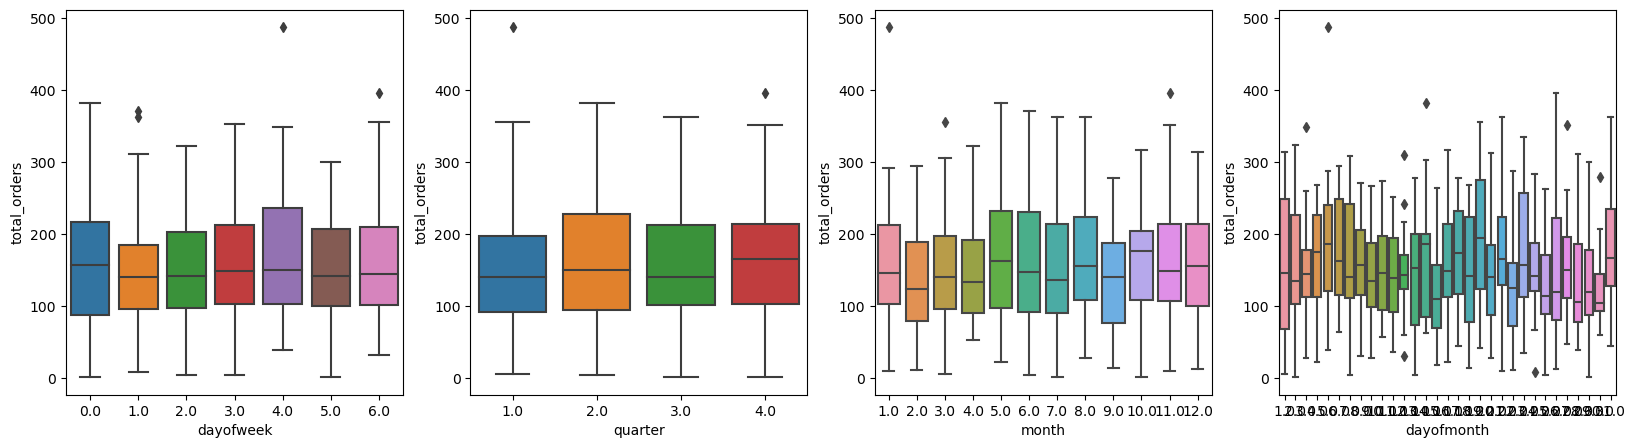

In [27]:
# There is a pattern observed from the below box plots in weekly sales, where people usually tend to buy product on weekday instead of weekend, 
# buy more in the middle and end of year, and buy less in the end of month.
# The below outliers seen may be due to very few orders received above 400 from the customers.

orders_df = orders.groupby('date').agg(total_orders=('order_id', 'nunique')).reset_index()

orders_df['date'] = pd.to_datetime(orders['date'])
orders_df['dayofweek'] = orders_df['date'].dt.dayofweek
orders_df['quarter'] = orders_df['date'].dt.quarter
orders_df['month'] = orders_df['date'].dt.month
orders_df['year'] = orders_df['date'].dt.year
orders_df['dayofyear'] = orders_df['date'].dt.dayofyear
orders_df['dayofmonth'] = orders_df['date'].dt.day

fig, ax = plt.subplots(1,4,figsize=(20,5))
for idx, col in enumerate(['dayofweek', 'quarter', 'month', 'dayofmonth']):
    sns.boxplot(data=orders_df, x=col, y='total_orders', ax=ax[idx])

In [28]:
 order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


C:\Users\RIDDHI\AppData\Local\Temp\ipykernel_26544\3560470126.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = order_items.price)


Text(0.5, 1.0, 'Price Distribution')

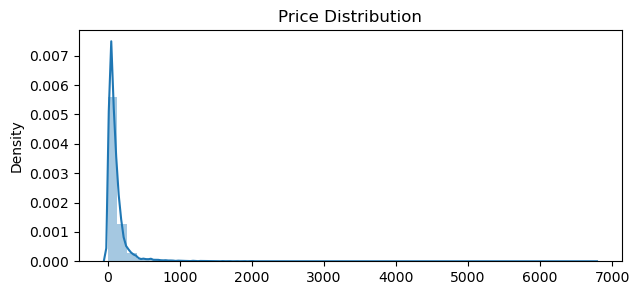

In [29]:
## Exploring the order_Items dataset
## From the below distribution plot of price variable we can see that maximum prices of the products lie in between 0 and 1000
## Their are rarely few products who's prices are greater than 1000

plt.figure(figsize=[7, 3])
sns.distplot(x = order_items.price)
plt.title('Price Distribution')

C:\Users\RIDDHI\AppData\Local\Temp\ipykernel_26544\4267517300.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = order_items.freight_value)


Text(0.5, 1.0, 'Freight Value Distribution')

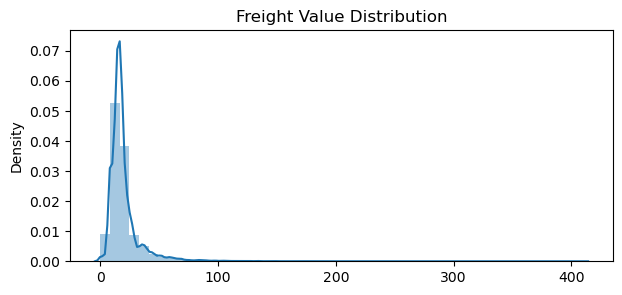

In [30]:
## Freight value is the amount that is paid to the carrier company for the transportation of the goods from the point of origin
## to an agreed location. The below distribution chart of the Freight variable gives an idea than maximum of the products
## have freight charges less than 100 , and their are roughly few products that have charges greater than 100.
plt.figure(figsize=[7, 3])
sns.distplot(x = order_items.freight_value)
plt.title('Freight Value Distribution')

In [31]:
## We can see the maximum and minimum prices of the products and their freight value.
## Also their are total of 112650 order Items to be delivered to the customers.
## The mean and standard deviation of the price is 121 and 183 respectively.
## The mean and standard deviation of the freight_value is 20 and 16 respectively.
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [32]:
pd.merge(products,product_category_name,on='product_category_name')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery
...,...,...,...,...,...,...,...,...,...,...
32933,13b25797ad1e6d6c7cd3cbeb35f8ee7a,moveis_colchao_e_estofado,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,furniture_mattress_and_upholstery
32934,dc36a7859b743d8610a2bbbaea26ece9,moveis_colchao_e_estofado,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,furniture_mattress_and_upholstery
32935,107fde0930956120d1e13dd1062fbb46,moveis_colchao_e_estofado,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,furniture_mattress_and_upholstery
32936,726b4e18f00255e2e63491bcba3f60b8,moveis_colchao_e_estofado,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,furniture_mattress_and_upholstery


In [33]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [34]:
## Merging the customers and orders dataset to remove some useful insights
customers_orders=pd.merge(customers,orders,on='customer_id')
customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,date,year,month,delivery_days,purchase_day,purchase_timestamp,purchase_time_of_day
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05-16,2017,05-2017,1,Tuesday,15,Afternoon
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01-12,2018,01-2018,13,Friday,20,Evening
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05-19,2018,05-2018,3,Saturday,16,Afternoon
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03-13,2018,03-2018,0,Tuesday,16,Afternoon
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07-29,2018,07-2018,10,Sunday,9,Morning


In [35]:
## Analysing how many customers are there from overall states of the brazil 
customers_per_state=customers_orders.groupby(customers_orders['customer_state'])['customer_id'].count().sort_values(ascending=False)
customers_per_state

customer_state
SP    40489
RJ    12351
MG    11352
RS     5342
PR     4923
SC     3547
BA     3256
DF     2080
ES     1995
GO     1957
PE     1593
CE     1278
PA      946
MT      886
MA      716
MS      701
PB      517
PI      476
RN      474
AL      397
SE      335
TO      274
RO      243
AM      145
AC       80
AP       67
RR       41
Name: customer_id, dtype: int64

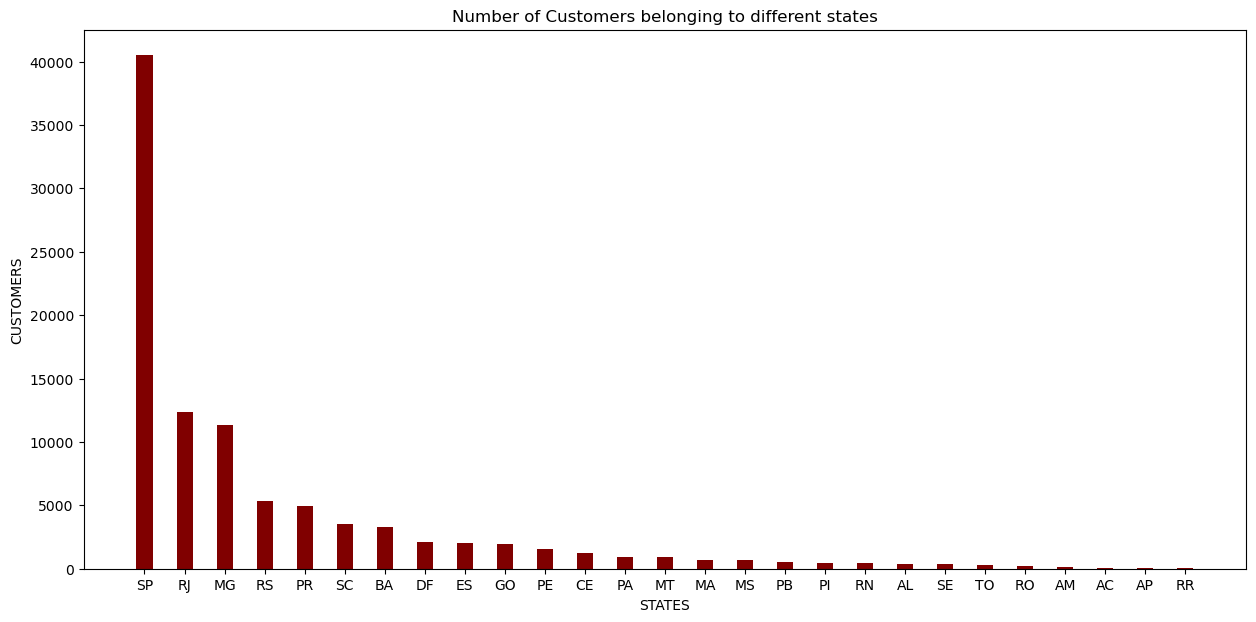

In [36]:
## We can see the distribution more clearly from the below bar graph. 
## We can see that more than 40000 customers are from SP followed by RJ and MG states.
plt.figure(figsize=(15,7))

plt.bar(customers_per_state.index, customers_per_state, color ='maroon', 
        width = 0.4)
 
plt.xlabel("STATES")
plt.ylabel("CUSTOMERS")
plt.title("Number of Customers belonging to different states")
plt.show()


In [37]:
## We can see that almost all orders where delivered from the below table. However 6 orders were cancelled.
order_status_df=pd.DataFrame(customers_orders.groupby(customers_orders['order_status'])['customer_id'].count().sort_values(ascending=False))
order_status_df

,customer_id
order_status,
delivered,96455
canceled,6
approved,0
created,0
invoiced,0
processing,0
shipped,0
unavailable,0


In [38]:
### We can get an idea of the different payment modes used to make payments by the customer from the below query.
order_payments['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

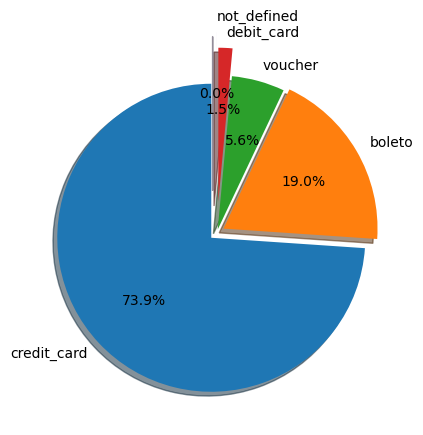

In [39]:
##From below pie chart we can observe that nearly 73 percent of customers use credit card for making payments.
## However 19 percent of them  use boleto, 5.6 percent use voucher , 1.5 percent use debit_cards. 
plt.figure(figsize=[7, 5])
plt.pie(order_payments.payment_type.value_counts().values, explode=(0.05,0.05, 0.02, 0.2,0.3),labels= order_payments.payment_type.value_counts().index, autopct='%1.1f%%',shadow=True, startangle=90);

In [40]:
### We can get an idea of how many number of customers have used which payment mode to buy the products.
order_payments['payment_type'].value_counts().reset_index()

,payment_type,count
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


In [41]:
### Below table gives an idea of total revenue generated by each payment method
revenue_from_payment_method = order_payments.groupby('payment_type')['payment_value'].sum().reset_index()
revenue_from_payment_method

,payment_type,payment_value
0,boleto,2869361.27
1,credit_card,12542084.19
2,debit_card,217989.79
3,not_defined,0.00
4,voucher,379436.87


In [42]:
max_no_of_installments=order_payments['payment_installments'].max()
min_no_of_installments=order_payments['payment_installments'].min()

In [43]:
max_no_of_installments

24

In [44]:
min_no_of_installments

0

{'whiskers': [<matplotlib.lines.Line2D at 0x24581f035d0>,
 'caps': [<matplotlib.lines.Line2D at 0x24581f02750>,
 'boxes': [<matplotlib.lines.Line2D at 0x24581f001d0>],
 'medians': [<matplotlib.lines.Line2D at 0x24581cb4550>],
 'fliers': [<matplotlib.lines.Line2D at 0x24581cb5310>],
 'means': []}

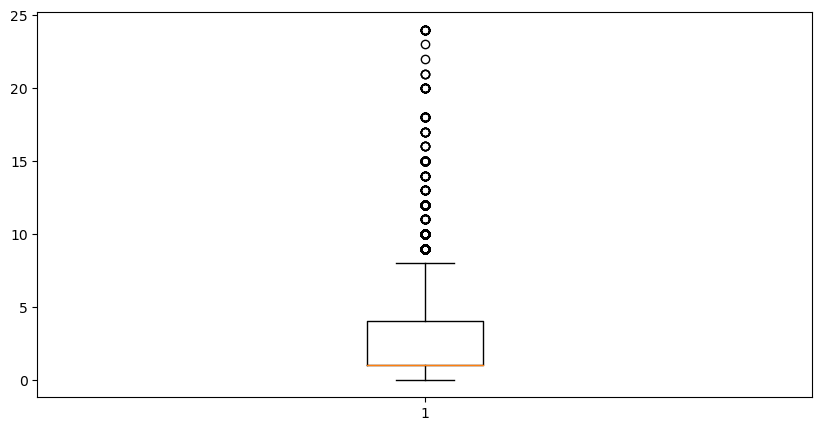

In [45]:
## From below box plot we can see that number of installments taken from cusotmer to buy a product lie between 0 and 8 approximately.
## However the third and first quartile values are nearly 2 and 4 respectively
## The outliers that are seen in the plot can be due to the minimum number of customers who have opted for installements
## greater than 10.

plt.figure(figsize=(10,5))
plt.boxplot(order_payments['payment_installments'])

In [46]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [47]:
## We can conclude the following observations from below table
## 1) payment_sequential - A customer may pay an order with more than one payment method. 
## If he does so, a sequence will be created and values will be added in this variable
## Most of the customers preferred one payment method , while few customers choose 29 different payment methods
## The maximum payment recevied is 13664 while minimum payment recevied is 0

order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [48]:
order_items_products=pd.merge(order_items,products,on='product_id')
order_items_products_orders=pd.merge(order_items_products,orders,on='order_id')
order_items_products_orders.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,date,year,month,delivery_days,purchase_day,purchase_timestamp,purchase_time_of_day
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2017-09-13,2017,09-2017,1,Wednesday,8,Morning
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,...,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26,2017-06-28,2017,06-2017,8,Wednesday,11,Morning
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,...,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07,2018-05-18,2018,05-2018,12,Friday,10,Morning
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,...,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25,2017-08-01,2017,08-2017,7,Tuesday,18,Afternoon
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,...,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01,2017-08-10,2017,08-2017,13,Thursday,21,Evening


In [49]:
order_items_products_orders.drop(columns=['order_item_id','product_id','seller_id','shipping_limit_date','order_purchase_timestamp','order_approved_at','order_estimated_delivery_date'],inplace=True)

In [50]:
order_items_products_orders

,order_id,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,...,order_status,order_delivered_carrier_date,order_delivered_customer_date,date,year,month,delivery_days,purchase_day,purchase_timestamp,purchase_time_of_day
0,00010242fe8c5a6d1ba2dd792cb16214,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,...,delivered,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-13,2017,09-2017,1,Wednesday,8,Morning
1,130898c0987d1801452a8ed92a670612,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,...,delivered,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-06-28,2017,06-2017,8,Wednesday,11,Morning
2,532ed5e14e24ae1f0d735b91524b98b9,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,...,delivered,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-05-18,2018,05-2018,12,Friday,10,Morning
3,6f8c31653edb8c83e1a739408b5ff750,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,...,delivered,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-01,2017,08-2017,7,Tuesday,18,Afternoon
4,7d19f4ef4d04461989632411b7e588b9,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,...,delivered,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-08-10,2017,08-2017,13,Thursday,21,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110175,ffebd80e3291e811c308365936897efd,129.9,51.20,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,...,delivered,2018-07-17 10:03:00,2018-07-23 19:44:45,2018-07-13,2018,07-2018,6,Friday,20,Evening
110176,ffee31fb4b5e35c9123608015637c495,99.0,13.52,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,...,delivered,2018-08-20 10:01:00,2018-08-21 12:18:57,2018-08-18,2018,08-2018,1,Saturday,10,Morning
110177,fff7c4452f050315db1b3f24d9df5fcd,736.0,20.91,relogios_presentes,33.0,658.0,3.0,400.0,19.0,9.0,...,delivered,2017-06-02 11:49:53,2017-06-08 13:04:40,2017-06-01,2017,06-2017,6,Thursday,16,Afternoon
110178,fffa82886406ccf10c7b4e35c4ff2788,229.9,44.02,esporte_lazer,32.0,280.0,2.0,2700.0,60.0,15.0,...,delivered,2017-12-20 18:55:00,2018-01-08 18:23:10,2017-12-18,2017,12-2017,18,Monday,16,Afternoon


array([12488,  9467,  8429,  8156,  7643,  6795,  5857,  4428,  4267,
        4139,  4030,  3715,  3342,  2982,  2729,  2466,  1986,  1924,
        1668,  1089,  1077,   916,   754,   657,   651,   596,   536,
         499,   495,   429,   362,   361,   305,   301,   289,   274,
         269,   264,   263,   257,   255,   232,   231,   206,   199,
         197,   197,   182,   150,   127,   125,   103,   103,    83,
          73,    70,    61,    57,    45,    42,    38,    37,    37,
          33,    30,    29,    24,    14,    14,    14,     8,     7,
           2], dtype=int64)

<Figure size 1000x600 with 0 Axes>

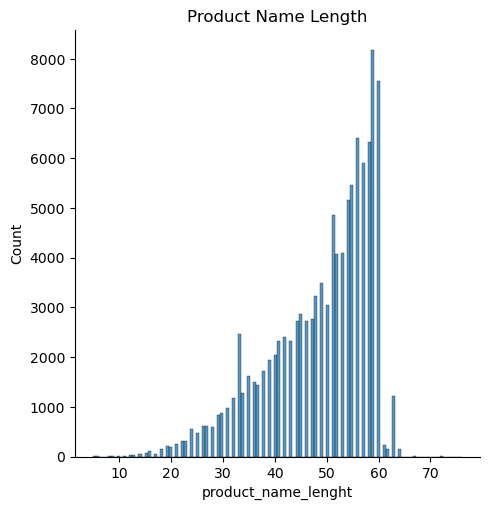

In [51]:
## Analysing the product name length variable
## Almost more than 8000 rows in the dataset have the product_category_name length variable greater than 58
plt.figure(figsize=[10, 6])
sns.displot(x = order_items_products_orders.product_name_lenght)
plt.title('Product Name Length')
order_items_products_orders.product_category_name.value_counts().values

C:\Users\RIDDHI\AppData\Local\Temp\ipykernel_26544\4135076672.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = order_items_products_orders.product_description_lenght)


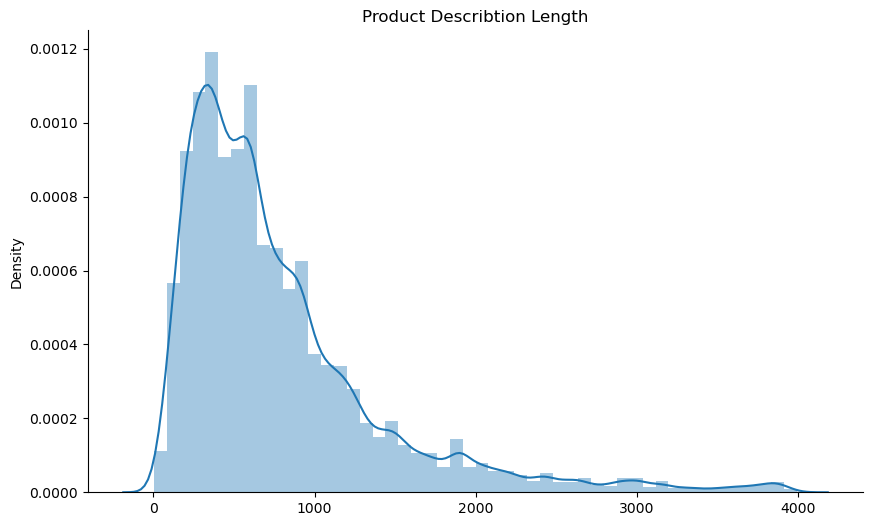

In [52]:
## We can get an idea about the product description length of the products that are available in the dataset
plt.figure(figsize=[10, 6])
sns.distplot(x = order_items_products_orders.product_description_lenght)
plt.title('Product Describtion Length')
sns.despine()

In [53]:
# numerical_insights_of_products=order_items_products_orders[['product_category_name','product_name_lenght',
#                                   'product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm',
#                                  'product_width_cm']]
# numerical_insights_of_products

# ## As there are more numerical features in above merged data_frame. We have tried to plot the subplots for all the product 
# ## categories and analysed each numerical feature for each product.
# sns.pairplot(numerical_insights_of_products,hue='product_category_name')

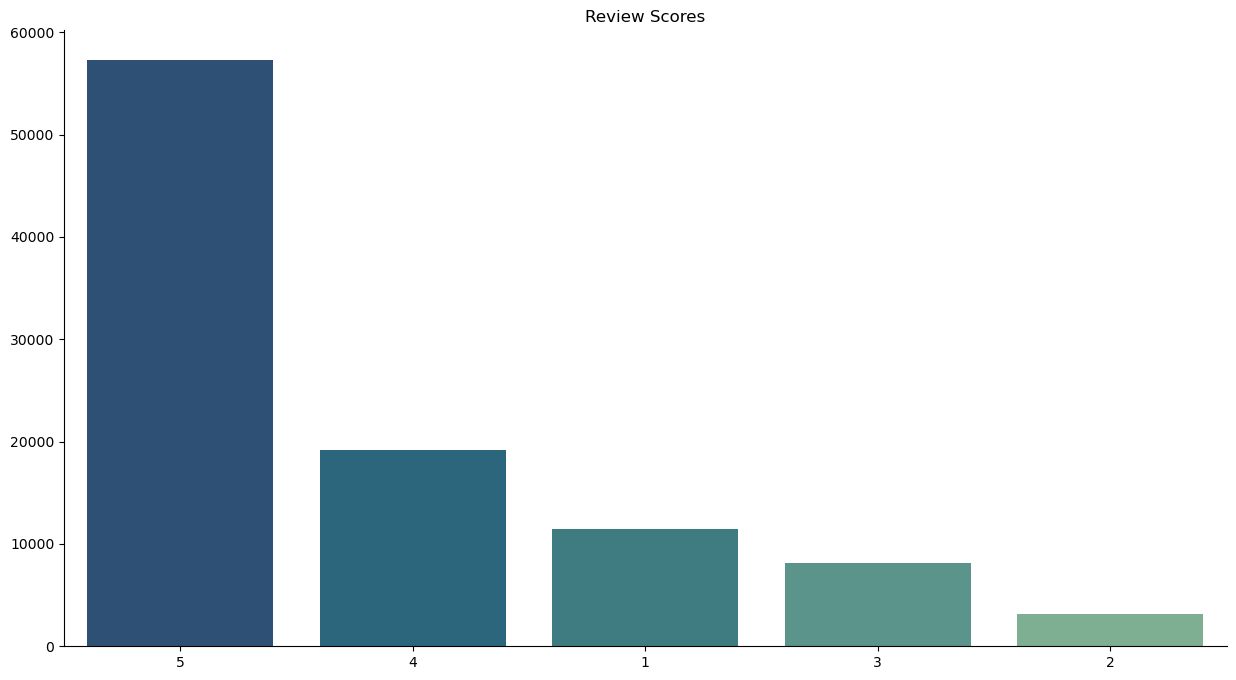

In [54]:
## The below bar graph shows the highest review count for products. 
## We can see nearly 60000 products purchased by the customer have 5 star rating. 
plt.figure(figsize=[15, 8])
review_score_index = [str(i) for i in order_reviews.review_score.value_counts().index]
sns.barplot(x = review_score_index, y= order_reviews.review_score.value_counts().values, palette= 'crest_r')
plt.title('Review Scores')
sns.despine()

In [55]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [56]:
sellers['seller_state'].unique()

array(['SP', 'RJ', 'PE', 'PR', 'GO', 'SC', 'BA', 'DF', 'RS', 'MG', 'RN',
       'MT', 'CE', 'PB', 'AC', 'ES', 'RO', 'PI', 'MS', 'SE', 'MA', 'AM',
       'PA'], dtype=object)

### Part3 - Visuvalizing the Dataset and finding anwers to business questions.

Q1) Have number of customers increased or decreased per year?

In [57]:
merge_customers_orders=pd.merge(customers,orders,on='customer_id')
customers_by_year = merge_customers_orders.groupby(merge_customers_orders['year'])['customer_unique_id'].count().reset_index()
customers_by_year

,year,customer_unique_id
0,2016,272
1,2017,43411
2,2018,52778


Ans for Q1) Customers and orders table have been merged on customer_id (foreign key). As customer_id feature can have duplicate values of one customer and same customer can buy many products, hence we have considered the customer_unique_id feature which has only one unique id for every customer.
From the EDA we have already calculated the year feature from the order_purchase_timestamp.
By using groupby on the year feature we have found the above values.
We can see that since 2016 to 2018 there has been a tremendious rise in customers population.

Q2) Which products are most and least purchased by the customer?

In [58]:
merged_products_orderItems = pd.merge(products,order_items,on='product_id')
merged_products_orderItems_orderPayments = pd.merge(merged_products_orderItems,order_payments,on='order_id')
merged_products_orderItems_orderPayments = pd.merge(merged_products_orderItems_orderPayments,product_category_name,on='product_category_name')
merged_products_orderItems_orderPayments.drop(columns=['product_category_name'],inplace=True)
merged_products_orderItems_orderPayments=merged_products_orderItems_orderPayments[['order_id','product_category_name_english']]
purchases_by_customers=merged_products_orderItems_orderPayments.groupby('product_category_name_english')['order_id'].count().sort_values(ascending=False)

In [59]:
top_5_most_purchased_products=purchases_by_customers.head(5)
top_5_most_purchased_products

product_category_name_english
bed_bath_table           13521
health_beauty             9972
sports_leisure            8945
furniture_decor           8744
computers_accessories     8082
Name: order_id, dtype: int64

In [60]:
least_5_most_purchased_products=purchases_by_customers.tail(5)
least_5_most_purchased_products

product_category_name_english
arts_and_craftmanship        24
la_cuisine                   16
cds_dvds_musicals            14
fashion_childrens_clothes     8
security_and_services         2
Name: order_id, dtype: int64

C:\Users\RIDDHI\AppData\Local\Temp\ipykernel_26544\446865330.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_5_most_purchased_products.index,rotation=45)
C:\Users\RIDDHI\AppData\Local\Temp\ipykernel_26544\446865330.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(least_5_most_purchased_products.index,rotation=45)


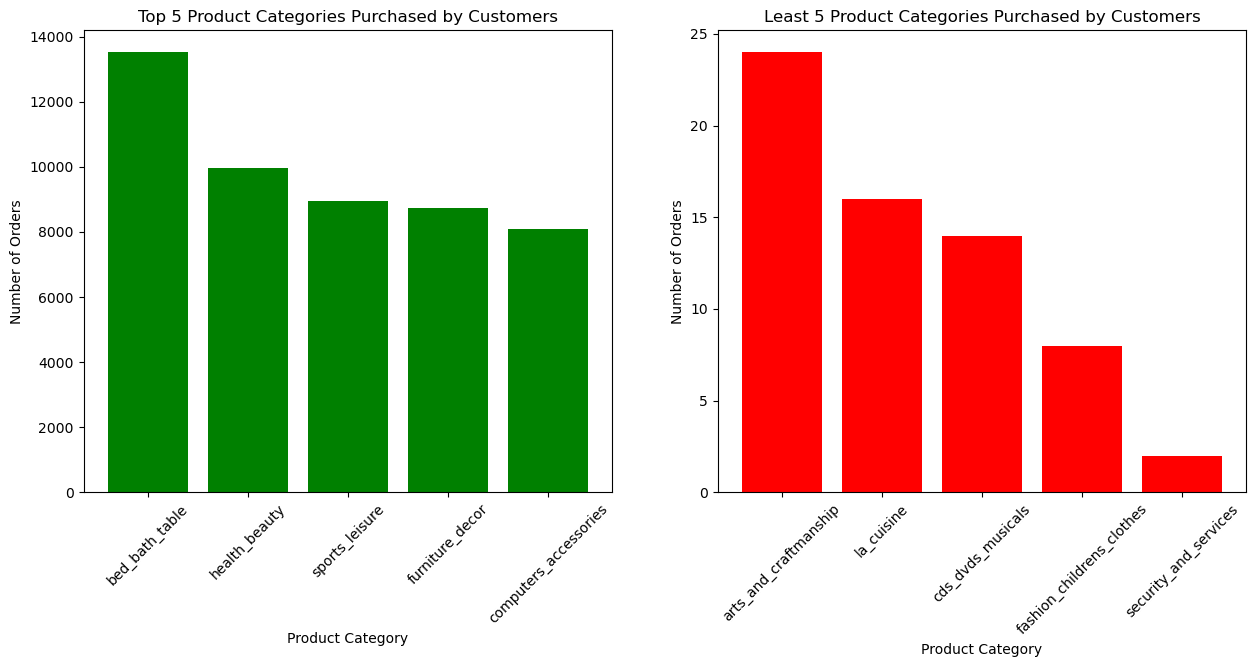

In [61]:
# Plotting subplots
fig,(ax1,ax2)=plt.subplots(1, 2, figsize=(15,6))

# Plotting the top 10 categories on the left subplot
ax1.bar(top_5_most_purchased_products.index, top_5_most_purchased_products.values, color='green')
ax1.set_xticklabels(top_5_most_purchased_products.index,rotation=45)
ax1.set_xlabel('Product Category')
ax1.set_ylabel('Number of Orders')
ax1.set_title('Top 5 Product Categories Purchased by Customers')

# Plotting the top 10 categories on the left subplot
ax2.bar(least_5_most_purchased_products.index,least_5_most_purchased_products.values,color='red')
ax2.set_xticklabels(least_5_most_purchased_products.index,rotation=45)
ax2.set_xlabel('Product Category')
ax2.set_ylabel('Number of Orders')
ax2.set_title('Least 5 Product Categories Purchased by Customers')

plt.show()

Ans for Q2) We have merged the products,order_items,order_payments table to get the name of only those products that have been purchased from the customer.
The Yaxis of the bar graph shows the number of orders recevied for product.
The Xaxis shows the Product category values.

As from the above bar graph we can list below observation:

Top 5 Product Categories Purchased by the Customer:

bed_bath_table           
health_beauty             
sports_leisure            
furniture_decor           
computers_accessories

Least 5 Product Categories Purchased by Customers:

arts_and_craftmanship        
la_cuisine                   
cds_dvds_musicals            
fashion_childrens_clothes    
security_and_services


Q3) Number of products that has top review score and the lowest review score

In [62]:
merge_orderReviews_orderItems=pd.merge(order_items,order_reviews,on='order_id')
merge_orderReviews_orderItems_products=pd.merge(merge_orderReviews_orderItems,products,on='product_id')
merge_orderReviews_orderItems_products_product_categories=pd.merge(merge_orderReviews_orderItems_products,product_category_name,on='product_category_name')

In [63]:
product_reviews=merge_orderReviews_orderItems_products_product_categories.groupby('product_category_name_english')['review_score'].mean()

In [64]:
# Getting the top 10 and least 10 review scored products
top_10=product_reviews.nlargest(10).sort_values(ascending=False)
least_10=product_reviews.nsmallest(10).sort_values(ascending=True)

In [65]:
top_10

product_category_name_english
cds_dvds_musicals                        4.642857
fashion_childrens_clothes                4.500000
books_general_interest                   4.446266
costruction_tools_tools                  4.444444
flowers                                  4.419355
books_imported                           4.400000
books_technical                          4.368421
food_drink                               4.315412
luggage_accessories                      4.315257
small_appliances_home_oven_and_coffee    4.302632
Name: review_score, dtype: float64

In [66]:
least_10

product_category_name_english
security_and_services                2.500000
diapers_and_hygiene                  3.256410
office_furniture                     3.493183
home_comfort_2                       3.629630
fashion_male_clothing                3.641221
fixed_telephony                      3.683206
party_supplies                       3.767442
fashio_female_clothing               3.780000
furniture_mattress_and_upholstery    3.815789
audio                                3.825485
Name: review_score, dtype: float64

C:\Users\RIDDHI\AppData\Local\Temp\ipykernel_26544\1928920481.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(top_10.index, rotation=45)
C:\Users\RIDDHI\AppData\Local\Temp\ipykernel_26544\1928920481.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(least_10.index, rotation=45)


(1.0, 10.0)

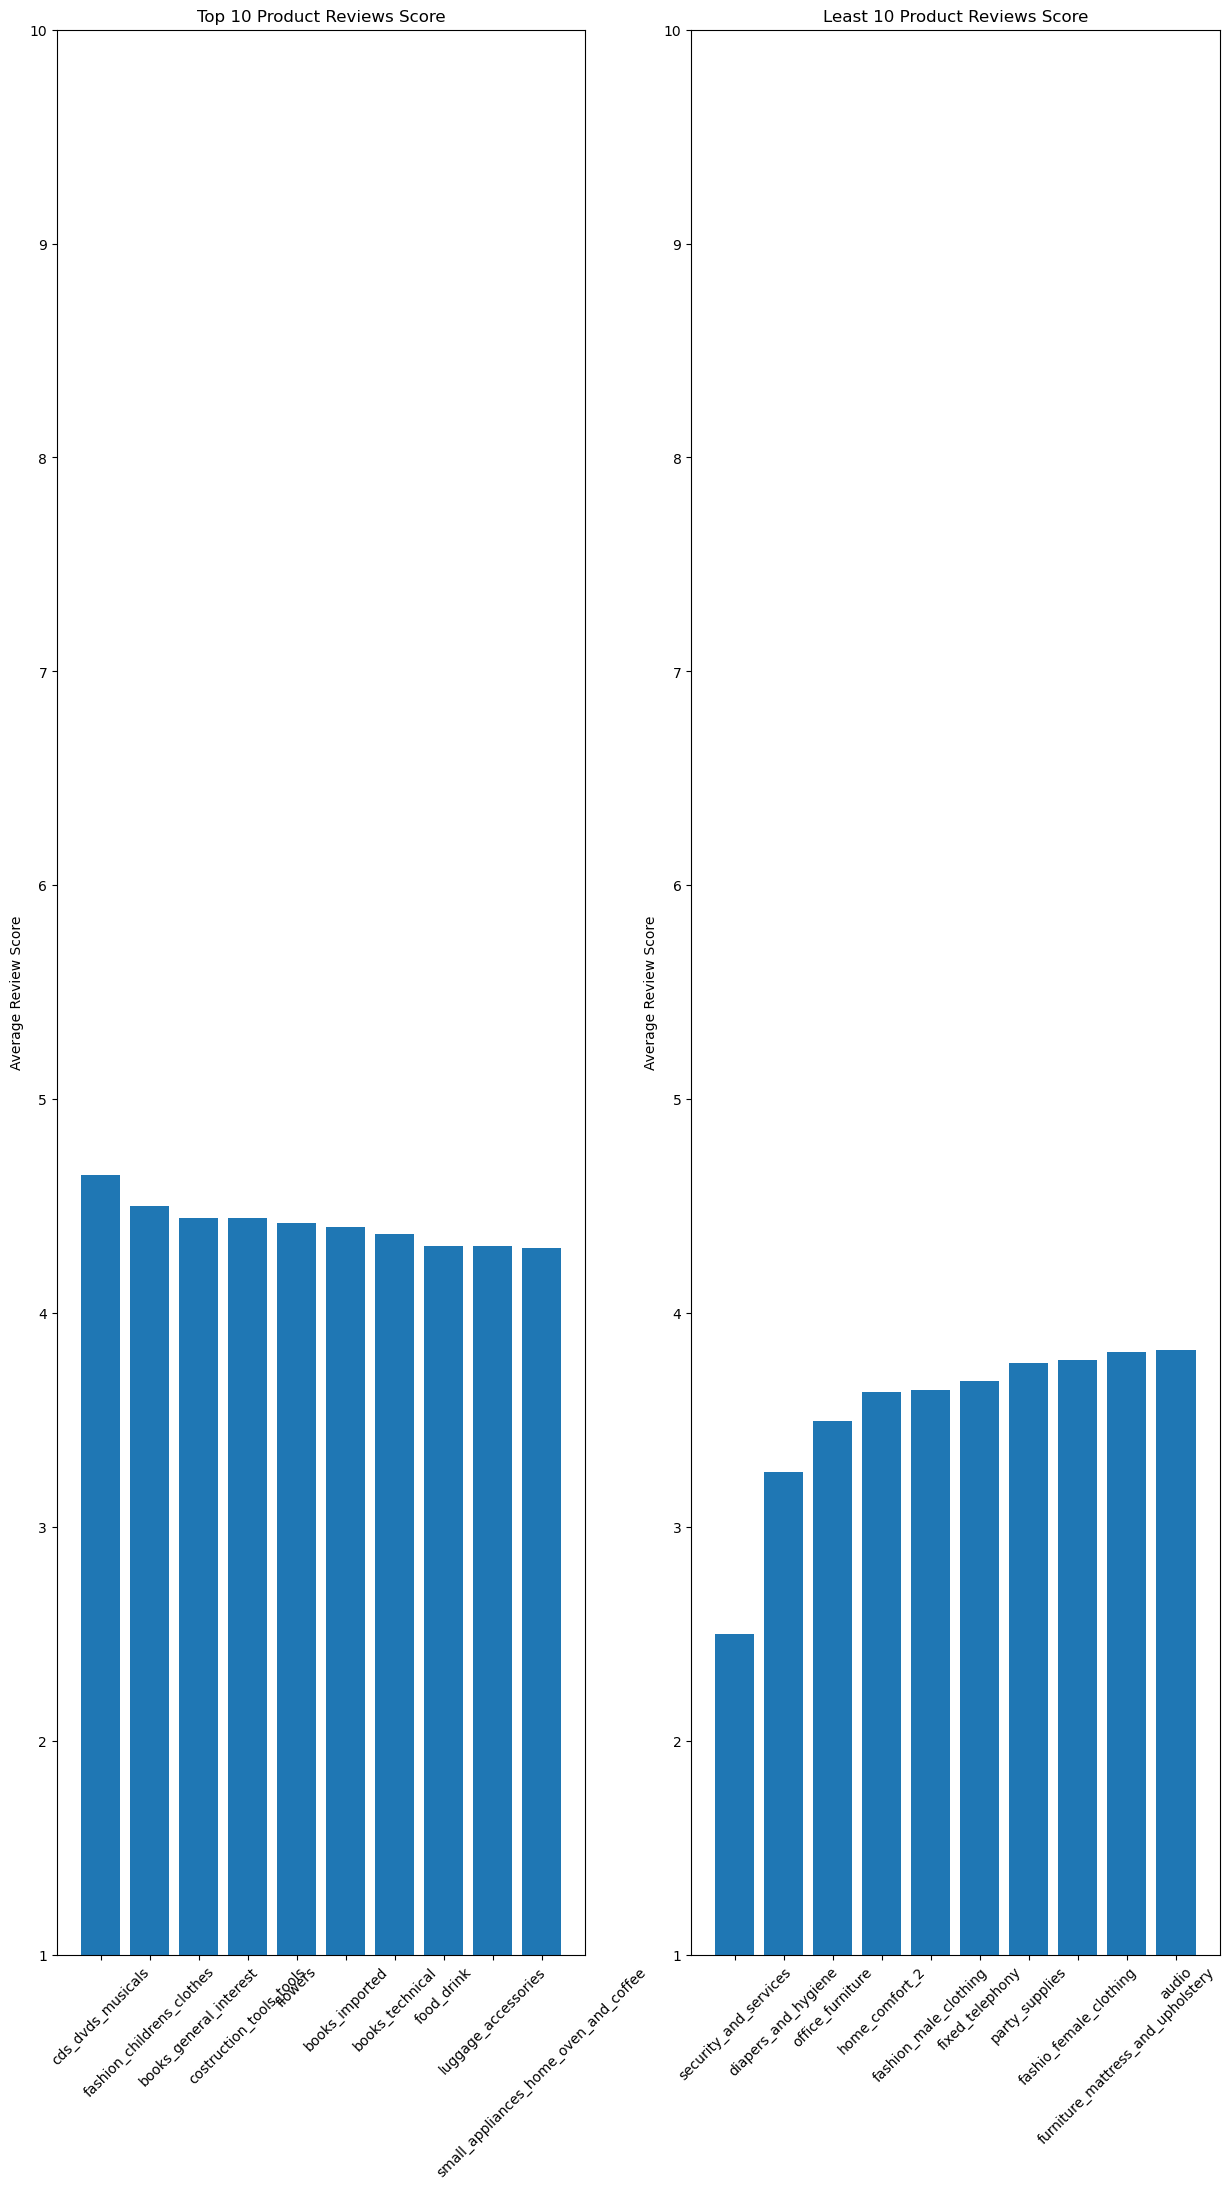

In [67]:
fig,axs=plt.subplots(1,2,figsize=(15,25))

axs[0].bar(top_10.index,top_10.values)
axs[0].set_title("Top 10 Product Reviews Score")
axs[0].set_xticklabels(top_10.index, rotation=45)
axs[0].set_ylabel('Average Review Score')
axs[0].set_ylim([1, 10])

axs[1].bar(top_10.index,least_10.values)
axs[1].set_title("Least 10 Product Reviews Score")
axs[1].set_xticklabels(least_10.index, rotation=45)
axs[1].set_ylabel('Average Review Score')
axs[1].set_ylim([1, 10])

Ans for Q3) We have merged three tables namely order_items,products and order_reviews to get all the product reviews and their details that are purchased by the customer.We have then grouped the products based on their category name that are purchased by the customer and calculated the mean of the all the reviews on that product and represented it in bar graph for better understanding.

The Yaxis of the bar represents the average review score for each product.
The Xaxis of the bar represents the Product category.

We can get following insites from the above bar graph:

Top 10 Products with the highest review:

cds_dvds_musicals                        
fashion_childrens_clothes           
books_general_interest                  
costruction_tools_tools                  
flowers                                  
books_imported                           
books_technical                          
food_drink                               
luggage_accessories                     
small_appliances_home_oven_and_coffee

Least 10 Products with the lowest Review:

security_and_services                
diapers_and_hygiene                 
office_furniture                     
home_comfort_2                       
fashion_male_clothing                
fixed_telephony                      
party_supplies                       
fashio_female_clothing               
furniture_mattress_and_upholstery    
audio                                




Q4) Top states that had maximum amount of orders

In [68]:
order_customers=pd.merge(orders,customers,on='customer_id')
order_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,date,year,month,delivery_days,purchase_day,purchase_timestamp,purchase_time_of_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-02,2017,10-2017,6,Monday,10,Morning,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-24,2018,07-2018,12,Tuesday,20,Evening,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-08,2018,08-2018,9,Wednesday,8,Morning,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-18,2017,11-2017,9,Saturday,19,Evening,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-13,2018,02-2018,1,Tuesday,21,Evening,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [69]:
def count_plot(x, df, title, xlabel, ylabel, width, height, order = None, rotation=False, palette='winter'):
    ncount = len(df)
    plt.figure(figsize=(width,height))
    ax = sns.countplot(x = x, palette=palette, order = order)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    

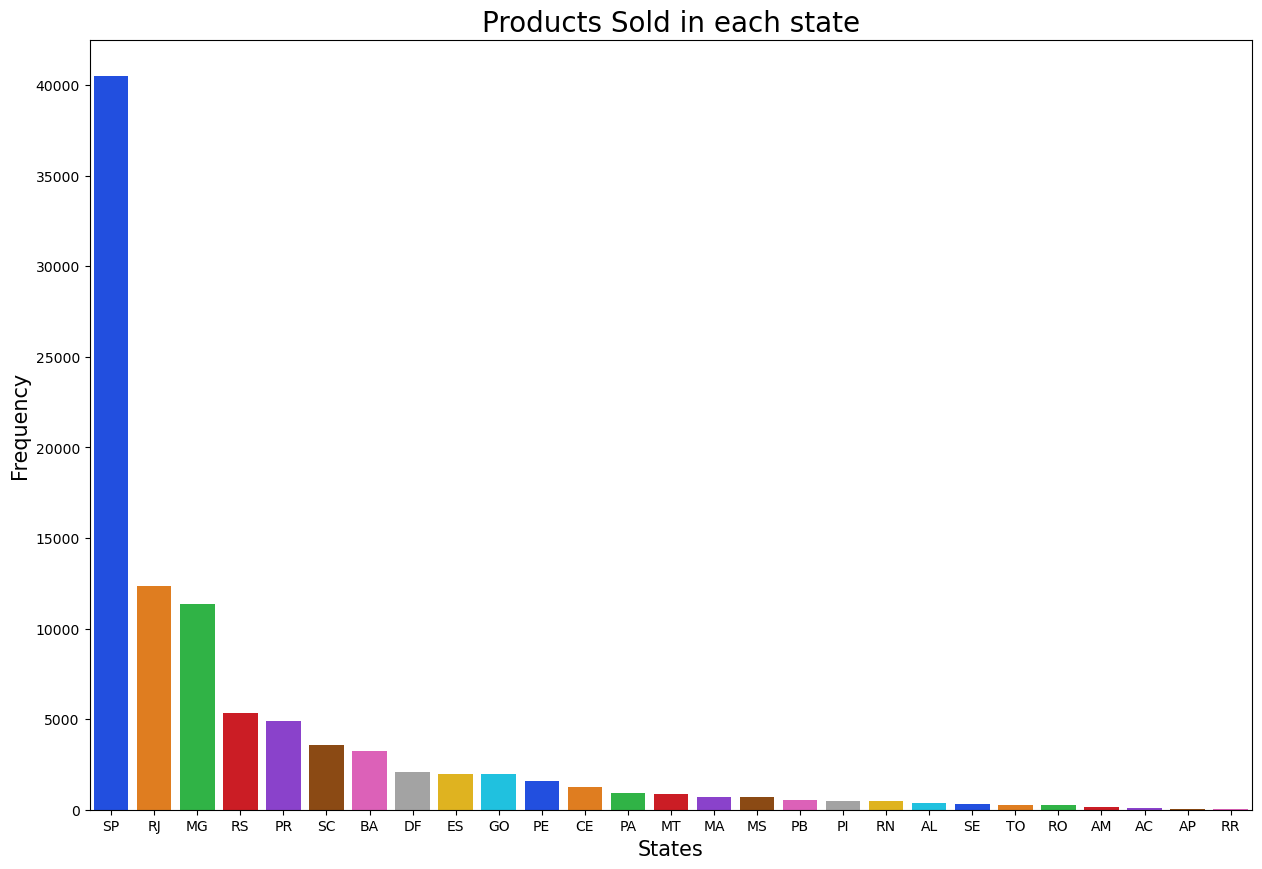

In [70]:
count_plot(order_customers['customer_state'], order_customers,"Products Sold in each state", 
           "States", 'Frequency', 15, 10, order=order_customers['customer_state'].value_counts().index, palette='bright')

Ans for Q4) We have merged the orders and customers dataset to get the count of all the customers those who have placed the order from different states. We have then grouped by the customer_state feature to get the order count recevied from each state.
We have then displayed the same in bar chart.

Top 5 states that have highest amount of orders are:

SP,
RJ,
MG,
RS,
PR

Q5) How do sales order of 2017 and 2018 compare?

In [71]:
## Because in 2018 data was only recorded until August, hence the, comparisons were made for January to August only.
orders['month_number'] = orders['order_purchase_timestamp'].dt.strftime('%m')
orders['year'] = orders['order_purchase_timestamp'].dt.strftime('20%y')
df_sales_date = orders.groupby(by=['month_number','year']).order_id.nunique().reset_index()
df_sales_date['month_number'] = df_sales_date['month_number'].astype(str).astype(int)
df_sales_date=df_sales_date[df_sales_date['month_number'] < 9 ]

month_names = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'Mei',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug'
}

df_sales_date['month_names'] = df_sales_date['month_number'].map(month_names)

Text(0.5, 29.140625000000036, '')

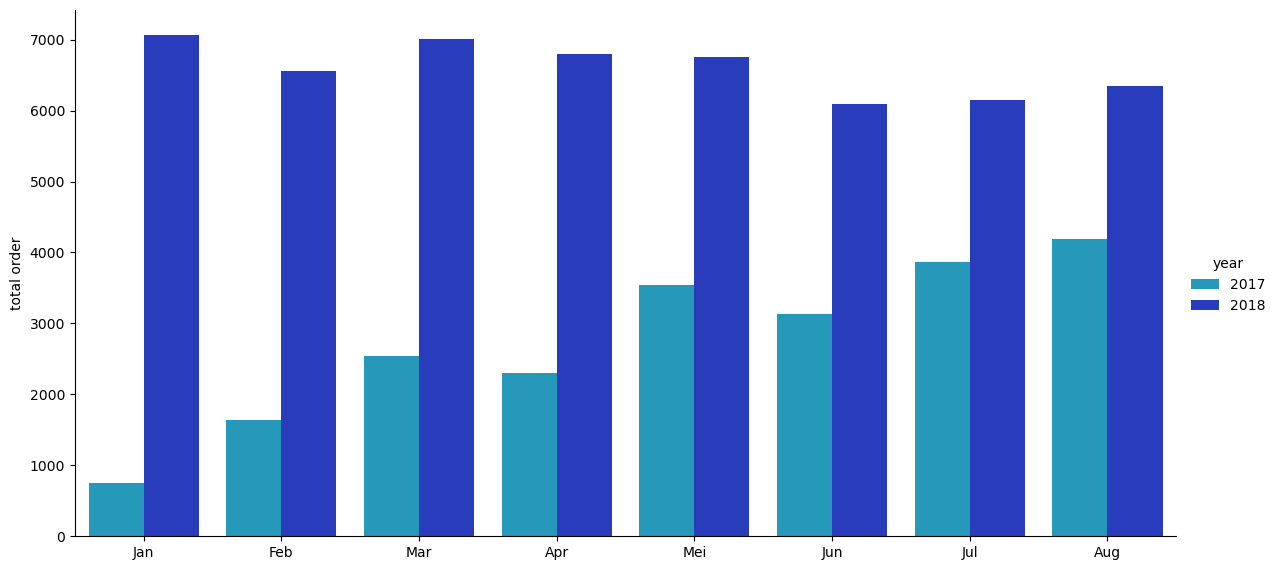

In [72]:
custom_palette = ["#0DA6D1", "#102cd4"]  
sns.catplot(x='month_names', y='order_id', hue='year', data=df_sales_date, kind='bar', height=6, aspect=2, palette = custom_palette)
plt.ylabel("total order")
plt.xlabel(None)

In [73]:
## Percentage increase in orders from 2017 to 2018
## As we can see in 2018, there was a significant increase in purchases compared to 2017 with an increase of 140.87%
(51461 - 21364) / 21364 *100

140.87717655869687

Ans for Q5) We have already calculated the year and month from the orders table from the orders_purchase_timestamp feature.
By performing operations on the year,month and days of the given timestamp in dataset we find the difference between 2017 and 2018 from January to August.
The above visuvalization clearly shows that there are much increase in orders in 2018 than as compared to 2017

Q6)What was the longest delivery days required to deliver a package from seller state to customer state?

In [74]:
merged_orders_customers=pd.merge(orders,customers,on='customer_id')
merged_orderItems_sellers=pd.merge(order_items,sellers,on='seller_id')

cust = merged_orders_customers[["customer_city","customer_state","delivery_days","order_id","customer_id"]]
seller = merged_orderItems_sellers[["order_id","seller_id","seller_city","seller_state"]]
cust_seller = cust.merge(seller, left_on='order_id', right_on='order_id',how='left')
cust_seller.describe()

cust_seller = cust_seller.drop_duplicates()

In [75]:
df_shipping_state = cust_seller.groupby(['seller_state', 'customer_state'])['delivery_days'].mean().sort_values(ascending=False).reset_index()
df_shipping_state

,seller_state,customer_state,delivery_days
0,CE,AM,138.000000
1,AM,AL,87.000000
2,BA,AC,63.000000
3,ES,PA,34.000000
4,GO,AM,29.500000
...,...,...,...
407,PB,PB,3.000000
408,GO,GO,2.903226
409,RN,RN,2.571429
410,DF,DF,1.440000


Ans for Q6) We have calculated the days required for delivery from orders table by using two given features such as order_delivered_customer_date and order_delivered_carrier_date . We have found the difference between order posting timestamp when it was handed to the logistic partner and order delivered timestamp when it was handed it to the customer.We have merged the details with the seller table to find the days required to deliver a product from seller to customer state.

From the above table we can see that the longest interstate package to be delivered took 138 days,from state CE to AM.